# Basic Model

In [79]:
%pwd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
base_path = '/home/ubuntu/data/statefarm/samples/' #imags/samples
train_path = base_path + 'train'
val_path = base_path + 'validation'
test_path = base_path + 'test'
weight_path = '/home/ubuntu/data/weights/statefarm/'
sub_path = '/home/ubuntu/fastai_course/neilz/part1/sub/statefarm/'

In [3]:
import vgg16

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)


In [4]:
vggm = vgg16.Vgg16()
#batch_size = 60
#train_data = vggm.get_batches(train_path, batch_size =batch_size)

vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Conv2D(filters, 3, 3, activation='relu'))
vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  model.add(Conv2D(filters, 3, 3, activation='relu'))
vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  model.add(Conv2D(filters, 3, 3, activation='relu'))
vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  model.add(Conv2D(filters, 3, 3, activation='relu'))


In [59]:
batch_size = 60
train_data = vggm.get_batches(train_path, batch_size =batch_size)
val_data = vggm.get_batches(val_path, batch_size =batch_size)

Found 100 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [18]:
for t in train_data:
    print(t[1][:5])
    break
print(train_data.class_indices)

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
{'c9': 9, 'c8': 8, 'c3': 3, 'c2': 2, 'c1': 1, 'c0': 0, 'c7': 7, 'c6': 6, 'c5': 5, 'c4': 4}


In [6]:
vggm.finetune(train_data)

In [20]:
from keras.callbacks import ModelCheckpoint
saved_weights_path = weight_path + '/sample.epoch_{epoch:02d}-valacc_{val_acc:.2f}.hdf5'
mcp = ModelCheckpoint(saved_weights_path, monitor='val_acc', save_weights_only=True, mode='auto', period=20)
call_backs = [mcp]
epochs = 200
h = vggm.fit(train_data, val_data, nb_epoch=epochs, batch_size = batch_size, callbacks=call_backs)

Epoch 1/200
2/1 [====================================] - 5s 3s/step - loss: 4.5399 - acc: 0.0822 - val_loss: 2.6728 - val_acc: 0.0400
Epoch 2/200
2/1 [====================================] - 5s 2s/step - loss: 4.2556 - acc: 0.1267 - val_loss: 2.7076 - val_acc: 0.1200
Epoch 3/200
2/1 [====================================] - 5s 2s/step - loss: 3.5007 - acc: 0.1800 - val_loss: 2.5032 - val_acc: 0.0800
Epoch 4/200
2/1 [====================================] - 5s 2s/step - loss: 3.2381 - acc: 0.1911 - val_loss: 2.4356 - val_acc: 0.2000
Epoch 5/200
2/1 [====================================] - 5s 3s/step - loss: 2.9735 - acc: 0.2183 - val_loss: 2.2957 - val_acc: 0.1800
Epoch 6/200
2/1 [====================================] - 5s 3s/step - loss: 2.8661 - acc: 0.2294 - val_loss: 2.2278 - val_acc: 0.1800
Epoch 7/200
2/1 [====================================] - 5s 3s/step - loss: 2.5098 - acc: 0.3678 - val_loss: 2.2633 - val_acc: 0.2400
Epoch 8/200
2/1 [====================================] - 5s 2s

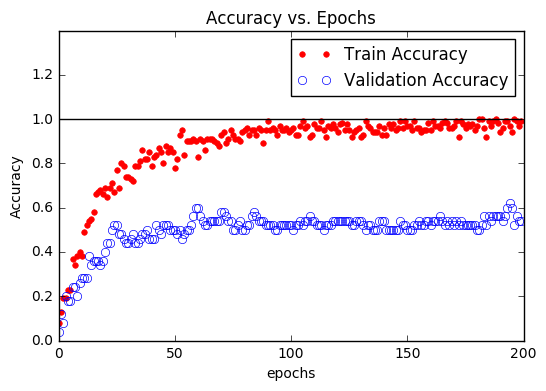

In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.DataFrame(h.history)
df['epoch'] =df.index

fig = plt.figure(1)
ax = fig.add_subplot(111)

ax.set_ylim(0,1.4)
ax.set_title('Accuracy vs. Epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('Accuracy')

line_train, =ax.plot(np.array(df['epoch']), np.array(df['acc']), '.', color='red', markersize=8)
#plt.plot(x=np.array(df['epoch']), y=np.array(df['acc']), style='o', ylim=(0,1.1), markerfacecolor="None", markeredgecolor='red')
line_val, = ax.plot(np.array(df['epoch']), np.array(df['val_acc']), 'o',  markerfacecolor="None", markeredgecolor='blue')
ax.plot(np.array(df['epoch']), np.ones(len(df)), 'black')
ax.legend((line_train, line_val), ('Train Accuracy', 'Validation Accuracy'))
fig.savefig(sub_path + '/sample_accuracy_vs_epochs.png')

In [105]:
val_data.classes
#val_data.__dict__
val_data.samples

50

In [91]:
import vgg16; reload(vgg16)
#vggm.model.save_weights(sub_path + '/sample_epochs200.h5')
vggm = vgg16.Vgg16()
batch_size = 60
vggm.model.load_weights(sub_path + '/sample_epochs200.h5')
from sklearn.metrics import confusion_matrix
val_batches, val_predictions = vggm.test(val_path, batch_size)

Found 50 images belonging to 10 classes.


In [106]:
val_preds = [np.argmax(k) for k in val_predictions]
#print(val_predictions[0])
#print(val_batches.classes)
#print(val_preds)
cnf_matrix = confusion_matrix(val_batches.classes, val_preds)
print(cnf_matrix)
test_batches, predictions = val_batches, val_predictions

[[3 0 0 1 0 0 0 0 1 0]
 [2 3 0 0 0 0 0 0 0 0]
 [0 1 3 0 0 0 0 0 1 0]
 [0 1 0 1 0 0 0 0 3 0]
 [0 0 1 0 3 0 0 0 1 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 1 2 0 1 1]
 [0 1 0 0 0 0 0 3 1 0]
 [0 1 0 0 0 2 0 1 1 0]
 [2 0 0 0 0 0 0 0 0 3]]


# Check examples that predicted good, bad, or neutral

[6, 8, 6, 5, 9, 7, 1, 7, 8, 7]
[6 6 6 6 6 7 7 7 7 7]


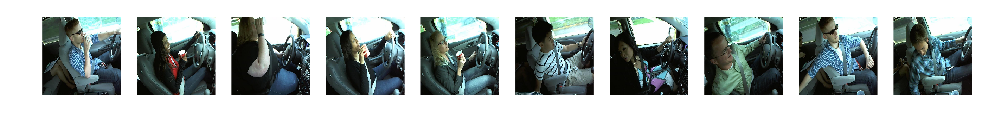

In [115]:
import utils; reload(utils)
from utils import plot, plots, plotgray

plots(next(val_batches)[30:40])
#print((next(val_batches)[0].shape))
print(val_preds[30:40])
print(val_batches.classes[30:40])

In [ ]:
s = test_batches.class_indices.keys()
s.sort()
print(s)
cols = ['img'] + s
print(cols)
dff = pd.DataFrame(predictions, columns=s)
print(dff.head())
print(len(predictions))
print(len(dff))
epochs = 200
print(df.columns.tolist())

In [71]:
%pwd

u'/home/ubuntu/fastai_course/neilz/part1'

# Create Submission File

In [73]:
def get_id(img_path):
    fid = img_path.split("/")[1] #Get image ID
    return fid

s = test_batches.class_indices.keys()
s.sort()
df = pd.DataFrame(predictions, columns=s)
df['img'] = test_batches.filenames
df['img'] = df.apply(lambda r: get_id(r['img']), axis=1)
cols = cols = ['img'] + s
df = df[cols]
#print(df)
fn = "./sub/statefarm/sample_batchsize_" + str(batch_size) + "_epochs" + str(epochs) +"_.csv"
df.to_csv(fn, index=False)
print("Write to " + fn)
print("DONE!")
from IPython.display import FileLink
FileLink(fn)  

Write to ./sub/statefarm/sample_batchsize_60_epochs200_.csv
DONE!


/home/ubuntu/fastai_course/neilz/part1/sub/statefarm/sample_batchsize_60_epochs200_.csv